In [1]:
!git clone https://github.com/gowun/MABTest.git

Cloning into 'MABTest'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 155 (delta 97), reused 112 (delta 54), pack-reused 0
Receiving objects: 100% (155/155), 153.25 KiB | 425.00 KiB/s, done.
Resolving deltas: 100% (97/97), done.


In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [0]:
from MABTest import Mass_MAB as mmab
from MABTest import user as usr
from MABTest import utils as ut
from MABTest import Mass_Simulation as ms

In [0]:
labels = ['TS', 'BayesUCB', 'UCB1', 'UCBtune']
posProb = [1.0, 1.0]

In [0]:
def make_users(nUser, nItem, posProb):
  users = []
  for i in range(nUser):
    it_prob = np.random.random_sample(nItem)
    #print(str(i) + ': ' + str(it_prob))
    users.append(usr.User(posProb, it_prob))

  return users

In [0]:
nUser = 100
nItem = 5
users = make_users(nUser, nItem, posProb)

In [0]:
mab_list = [[mmab.Mass_MAB(nUser, list(range(nItem)), posProb, l, 0) for l in labels], [mmab.Mass_MAB(nUser, list(range(nItem)), posProb, l+'_wScore', 1) for l in labels], 
            [mmab.Mass_MAB(nUser, list(range(nItem)), posProb, l+'_wScore', 2) for l in labels]]

In [0]:
def bunch_simulation(mab_list, users, len_simulation, n_simulation, model_accs=[]):
  results = []
  for m in mab_list:
    tmp = ms.Mass_Simulation(m, users, len_simulation, n_simulation, model_accs)
    results.append(tmp.mean_simulation())
    print(results[-1][1])
  return results

In [13]:
%%time
model_accs = [0.8, 0.5]
results_per_setting = []
for i, mab in enumerate(mab_list):
  print(i)
  if i == 0:
    mc = []
  else:
    mc = model_accs[:i]
  results_per_setting.append(bunch_simulation(mab, users, 12, 50, mc))

0
[ 0.47625056 -0.01043115 -0.50215467 -0.49950456  0.44454808  0.74866286
  0.06752609 -0.28487628 -0.12609576  0.38201865  0.31262552  0.83077838]
[0.55407113 0.77396398 0.72925592 0.83826941 0.0715604  1.30722051
 0.61145098 1.0608368  3.13674729 3.58552341 3.12183936 3.42510832]
[0.70658772 1.95914876 1.45225685 0.44033805 0.25620532 2.06847864
 3.03126719 2.26905823 2.11845956 1.98921392 2.52845999 2.62458419]
[0.56197665 0.30418471 1.01572624 1.46726777 1.5388093  2.71035083
 2.50189237 2.1934339  2.62497543 3.37651696 2.92805849 3.25960002]
1
[ 0.26880187 -1.1346884  -1.99256154 -2.84784287 -3.11178332 -4.29892355
 -4.32798466 -5.41196966 -4.83789385 -4.69515358 -5.01696657 -5.34380399]
[-0.732969   -2.16268994 -1.27150615 -1.57273529 -1.15657085 -2.40440387
 -2.46763006 -2.86287732 -4.15847082 -4.0758363  -3.79094647 -3.66886741]
[ 0.19091889  0.79817249  0.40973469  0.47098694 -0.37065864  0.2605036
 -0.7645625  -1.60268308 -2.70373    -1.92828431 -2.83862509 -3.76811922]
[ 1.

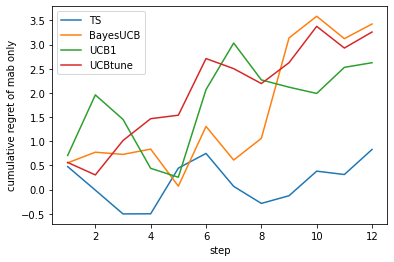

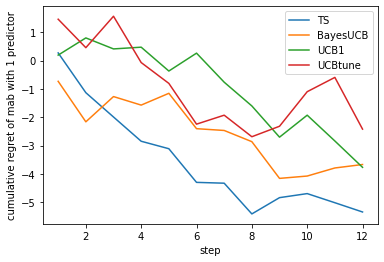

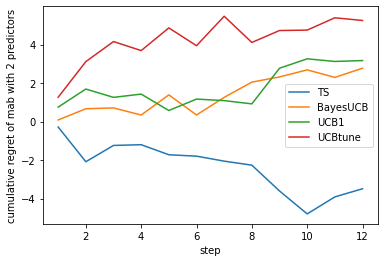

In [16]:
y_labels = list(map(lambda x: 'cumulative regret of ' + x, ['mab only', 'mab with 1 predictor', 'mab with 2 predictors']))
for i, y in enumerate(y_labels[:3]):
  tmp = list(map(lambda x: results_per_setting[i][x][1], range(len(labels))))
  #print(tmp)
  ut.comparison_figure(list(range(1, 13)), tmp, labels, 'step', y)

In [25]:
hit_mdl_used = list(map(lambda x: mab_list[2][x].mab.M, range(len(mab_list[2]))))
hit_mdl_used = pd.DataFrame(hit_mdl_used, columns=['model_1', 'model_2'], index=labels)
hit_mdl_used

,model_1,model_2
TS,57703,19843
BayesUCB,56822,20228
UCB1,37483,37236
UCBtune,52583,23932
